In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import scipy.stats as stats
from scipy.stats import rankdata
from math import sqrt
from scipy.stats import norm

In [2]:
dissolved_oxygen = [5.0, 3.4, 3.9, 1.3, 0.2, 0.9, 2.7, 3.7, 3.8, 4.1, 1.0, 1.0, 0.8, 0.4, 3.8, 4.5, 5.3, 6.1, 6.9, 6.5]

Mean: 3.2649999999999997
Median: 3.75
Variance: 4.299275
Q1: 1.0
Q3: 4.625


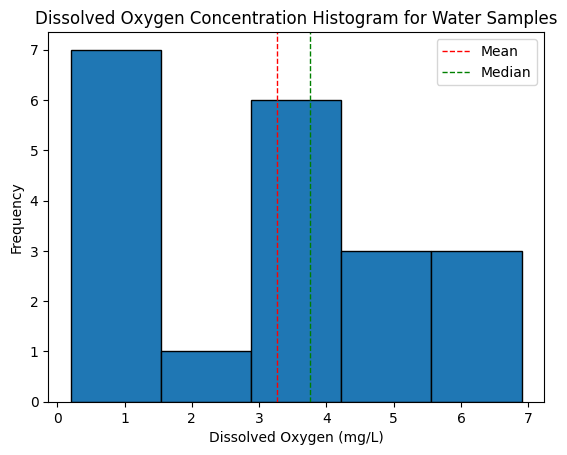

In [3]:
mean = np.mean(dissolved_oxygen)
median = np.median(dissolved_oxygen)
variance = np.var(dissolved_oxygen)
q1 = np.percentile(dissolved_oxygen, 25)
q3 = np.percentile(dissolved_oxygen, 75)

print('Mean:', mean)
print('Median:', median)
print('Variance:', variance)
print('Q1:', q1)
print('Q3:', q3)

plt.hist(dissolved_oxygen, bins=5, edgecolor='black')
plt.title('Dissolved Oxygen Concentration Histogram for Water Samples')
plt.xlabel('Dissolved Oxygen (mg/L)')
plt.ylabel('Frequency')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

In [4]:
# shapiro wilk
_, p = stats.shapiro(dissolved_oxygen)
print(f'p = {p:.4f}')

p = 0.1454


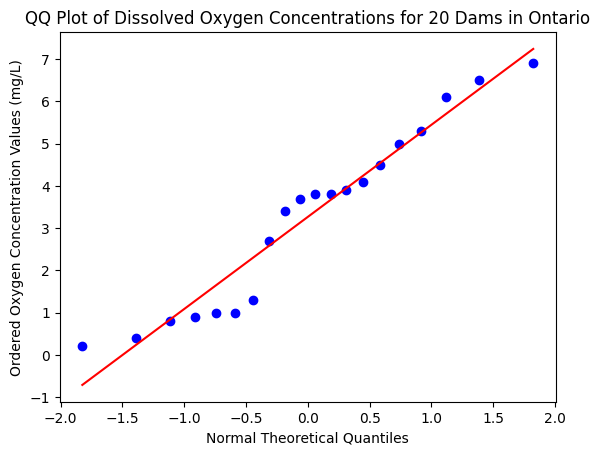

In [5]:
stats.probplot(dissolved_oxygen, dist="norm", plot=plt)
plt.title('QQ Plot of Dissolved Oxygen Concentrations for 20 Dams in Ontario')
plt.xlabel('Normal Theoretical Quantiles')
plt.ylabel('Ordered Oxygen Concentration Values (mg/L)')
plt.show()

In [6]:
alpha = 0.01

n = len(dissolved_oxygen)
df = n - 1
mean = np.mean(dissolved_oxygen)
stdev = np.std(dissolved_oxygen, ddof=1)
t_statistic = (mean - 4) / (stdev / np.sqrt(n))
t_crit = stats.t.ppf(1 - alpha / 2, df)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

t_statistic, t_crit, p_value

(-1.5451353441390414, 2.860934606449914, 0.13880710560932807)

In [7]:
alpha = 1 - 0.80
n = len(dissolved_oxygen)
mean = np.mean(dissolved_oxygen)
std_dev = np.std(dissolved_oxygen, ddof=1)
t_critical = stats.t.ppf(1-alpha/2, df=n-1)
print(t_critical)
std_err = std_dev / np.sqrt(n)

ci_lower = mean - t_critical * std_err
ci_upper = mean + t_critical * std_err

print((ci_lower, ci_upper))

1.3277282090267986
(2.63341763581658, 3.8965823641834194)


# Question 2

In [8]:
PM = [63, 57, 58, 62, 66, 58, 61, 60, 55, 62, 59, 60, 58]
PMM = [69, 65, 59, 62, 61, 57, 59, 60, 60, 62, 61, 66, 68, 66]

In [9]:
stat_PM, p_PM = stats.shapiro(PM)
stat_PMM, p_PMM = stats.shapiro(PMM)
print(p_PM, p_PMM)

0.9483157396316528 0.35335421562194824


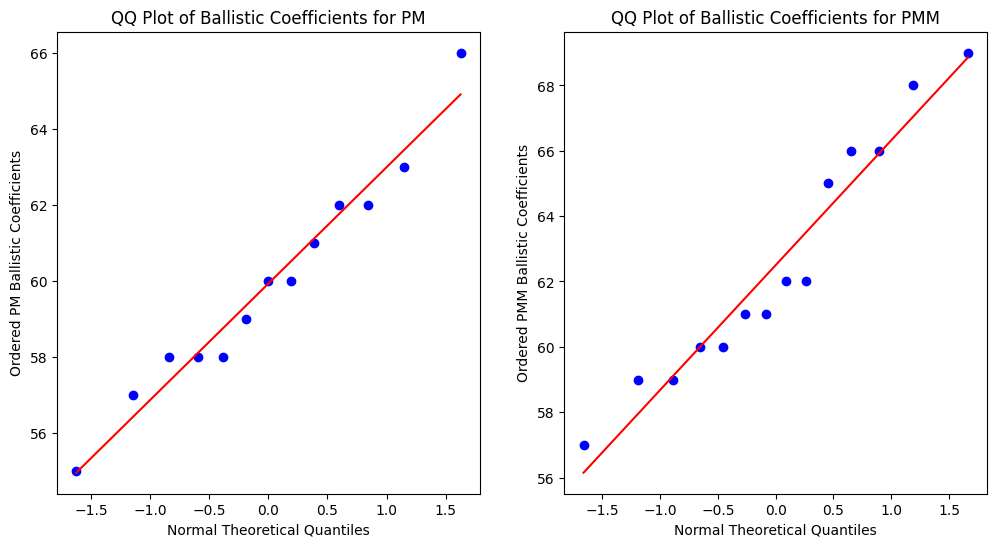

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

stats.probplot(PM, dist="norm", plot=axs[0])
axs[0].set_title('QQ Plot of Ballistic Coefficients for PM')
axs[0].set_xlabel('Normal Theoretical Quantiles')
axs[0].set_ylabel('Ordered PM Ballistic Coefficients')

stats.probplot(PMM, dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot of Ballistic Coefficients for PMM')
axs[1].set_xlabel('Normal Theoretical Quantiles')
axs[1].set_ylabel('Ordered PMM Ballistic Coefficients')

plt.show()

In [11]:
from scipy.stats import levene

# levene
stat, p_value = levene(PM, PMM)

print(f"Levene's test statistic: {stat}")
print(f"p-value for Levene's test: {p_value}")

if p_value < 0.05:
    print("The variances are significantly different (use Welch's t-test).")
else:
    print("The variances are not significantly different (use Student's t-test).")

Levene's test statistic: 0.7760475607596782
p-value for Levene's test: 0.3867435858967039
The variances are not significantly different (use Student's t-test).


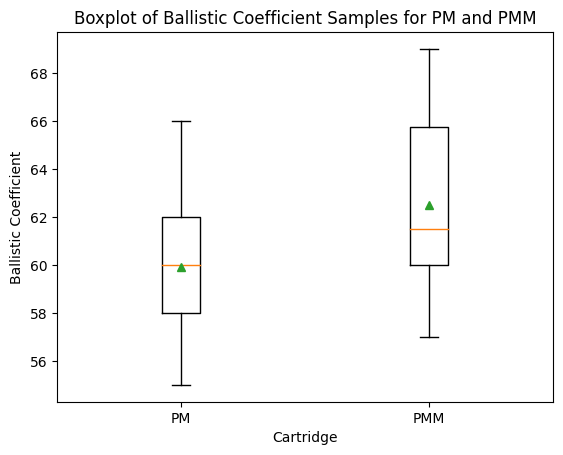

8.41025641025641 13.5


In [12]:
plt.boxplot([PM, PMM], labels=['PM', 'PMM'], showmeans=True)
plt.xlabel('Cartridge')
plt.ylabel('Ballistic Coefficient')
plt.title('Boxplot of Ballistic Coefficient Samples for PM and PMM')
plt.show()

var_PM = np.var(PM, ddof=1)
var_PMM = np.var(PMM, ddof=1)
print(var_PM, var_PMM)

In [13]:
n_PM = len(PM)
n_PMM = len(PMM)
df = n_PM + n_PMM - 2
mean_PM = np.mean(PM)
mean_PMM = np.mean(PMM)
stdev_PM = np.std(PM, ddof=1)
stdev_PMM = np.std(PMM, ddof=1)
s_p = np.sqrt(((n_PM - 1) * stdev_PM ** 2 + (n_PMM - 1) * stdev_PMM ** 2) / (n_PM + n_PMM - 2))
t_statistic = (mean_PMM - mean_PM) / (s_p * np.sqrt(1 / n_PM + 1 / n_PMM))
p = (1 - stats.t.cdf(t_statistic, df))*2

print(t_statistic, p)

2.0120470056553175 0.05510877276061188


In [14]:
t_statistic, p = stats.ttest_ind(PMM, PM, equal_var=True)
t_statistic, p

(2.0120470056553175, 0.05510877276061202)

In [15]:
pooled_stdev = np.sqrt(((n_PM - 1) * stdev_PM ** 2 + (n_PMM - 1) * stdev_PMM ** 2) / (n_PM + n_PMM - 2))
t_critical = stats.t.ppf(1 - 0.025, df)

mean_diff = mean_PMM - mean_PM
margin_of_error = t_critical * pooled_stdev * np.sqrt(1 / n_PM + 1 / n_PMM)

lower_bound = mean_diff - margin_of_error
upper_bound = mean_diff + margin_of_error

print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

95% Confidence Interval: (-0.0608, 5.2147)


# Question 3

In [16]:
unit_A = [954, 999, 1098, 1090, 985, 1005, 1009, 1063, 1086, 998]
unit_B = [1003, 1053, 900, 997, 1008, 1011, 972, 1091, 1073, 1025]

mean_A = np.mean(unit_A)
mean_B = np.mean(unit_B)
median_A = np.median(unit_A)
median_B = np.median(unit_B)
var_A = np.var(unit_A, ddof=1)
var_B = np.var(unit_B, ddof=1)
kurtosis_A = stats.kurtosis(unit_A)
kurtosis_B = stats.kurtosis(unit_B)

print(mean_A, mean_B)
print(median_A, median_B)
print(var_A, var_B)
print(kurtosis_A, kurtosis_B)

1028.7 1013.3
1007.0 1009.5
2587.122222222222 2918.011111111111
-1.4088319542474053 0.18156970347718016


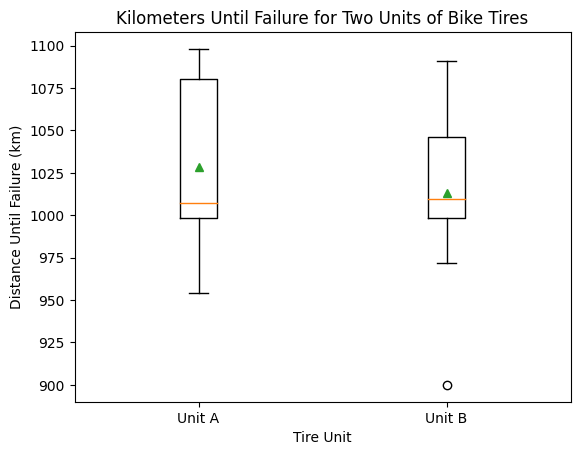

In [17]:
# boxplot
plt.boxplot([unit_A, unit_B], labels=['Unit A', 'Unit B'], showmeans=True)
plt.xlabel('Tire Unit')
plt.ylabel('Distance Until Failure (km)')
plt.title('Kilometers Until Failure for Two Units of Bike Tires')
plt.show()

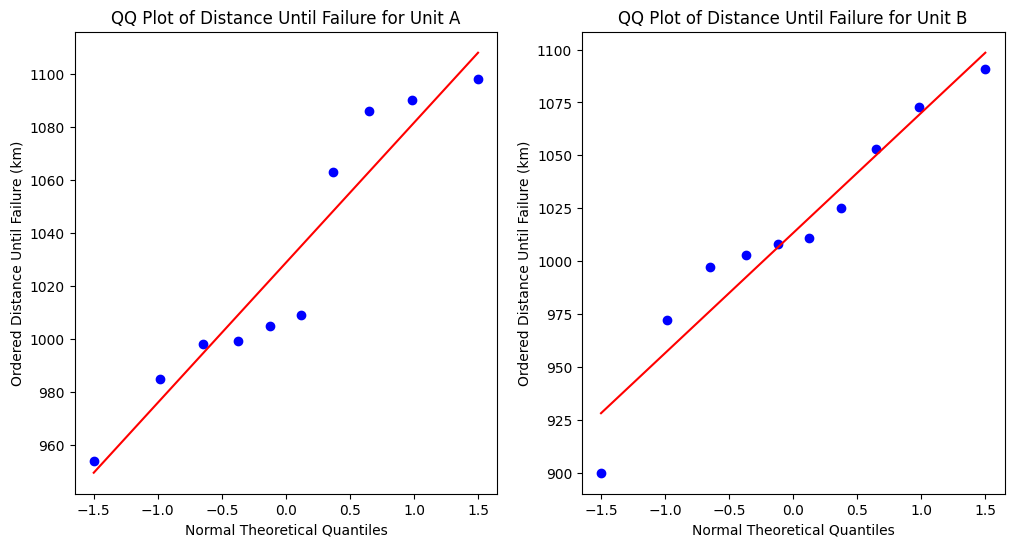

In [18]:
# qq plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
stats.probplot(unit_A, dist="norm", plot=axs[0])
axs[0].set_title('QQ Plot of Distance Until Failure for Unit A')
axs[0].set_xlabel('Normal Theoretical Quantiles')
axs[0].set_ylabel('Ordered Distance Until Failure (km)')
stats.probplot(unit_B, dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot of Distance Until Failure for Unit B')
axs[1].set_xlabel('Normal Theoretical Quantiles')
axs[1].set_ylabel('Ordered Distance Until Failure (km)')
plt.show()

In [19]:
alpha = 0.01
unit_A = [954, 999, 1098, 1090, 985, 1005, 1009, 1063, 1086, 998]
unit_B = [1003, 1053, 900, 997, 1008, 1011, 972, 1091, 1073, 1025]
combined_data = np.array(unit_A + unit_B)
ranks = rankdata(combined_data)

rank_sum_A = sum(ranks[:len(unit_A)])
rank_sum_B = sum(ranks[len(unit_A):])
n_A = len(unit_A)
n_B = len(unit_B)
U_A = rank_sum_A - n_A * (n_A + 1) / 2
U_B = rank_sum_B - n_B * (n_B + 1) / 2
U = min(U_A, U_B)
U_crit = int(round((n_A * n_B / 2) - (norm.ppf(1 - alpha / 2)) * sqrt(n_A * n_B * (n_A + n_B + 1) / 12)))

print(f"U statistic: {U}")
print(f"U critical: {U_crit}")

U statistic: 46.0
U critical: 16


In [20]:
mu_U = n_A * n_B / 2
sigma_U = sqrt(n_A * n_B * (n_A + n_B + 1) / 12)
z = (U - mu_U) / sigma_U
p_value = 2 * norm.cdf(-abs(z))
print(f"p-value: {p_value}")

p-value: 0.7623688184698398


# Question 4

In [21]:
alpha = 0.05

before = np.array([265, 240, 256, 295, 252, 245, 287, 313, 254, 279, 283, 240, 238, 225, 247])
after  = np.array([229, 231, 228, 240, 238, 241, 234, 259, 244, 239, 246, 218, 219, 226, 233])
w = before - after

t_statistic, _ = stats.ttest_rel(before, after)
n = len(before)
df = n - 1
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df)

print(f"t-statistic: {t_statistic:.4f}")
print(f"critical t: {t_critical:.4f}")


t-statistic: 5.4461
critical t: 1.7613


261.26666666666665 235.0
254.0 234.0
26.266666666666666 22.0 18.67950238961974


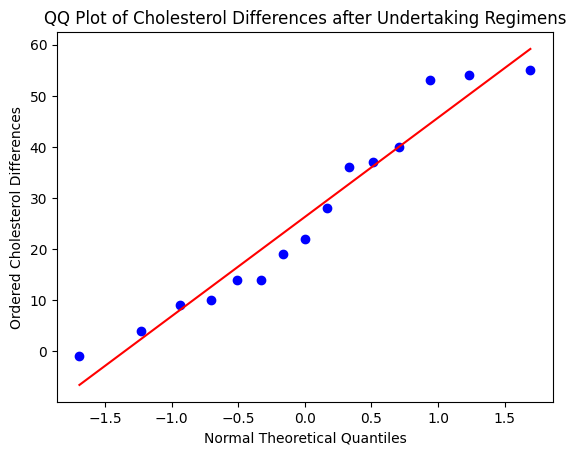

In [22]:
mean_before = np.mean(before)
mean_after = np.mean(after)
median_before = np.median(before)
median_after = np.median(after)
print(mean_before, mean_after)
print(median_before, median_after)

mean_w = np.mean(w)
median_w = np.median(w)
stdev_w = np.std(w, ddof=1)
print(mean_w, median_w, stdev_w)

# qq
stats.probplot(w, dist="norm", plot=plt)
plt.title('QQ Plot of Cholesterol Differences after Undertaking Regimens')
plt.xlabel('Normal Theoretical Quantiles')
plt.ylabel('Ordered Cholesterol Differences')
plt.show()

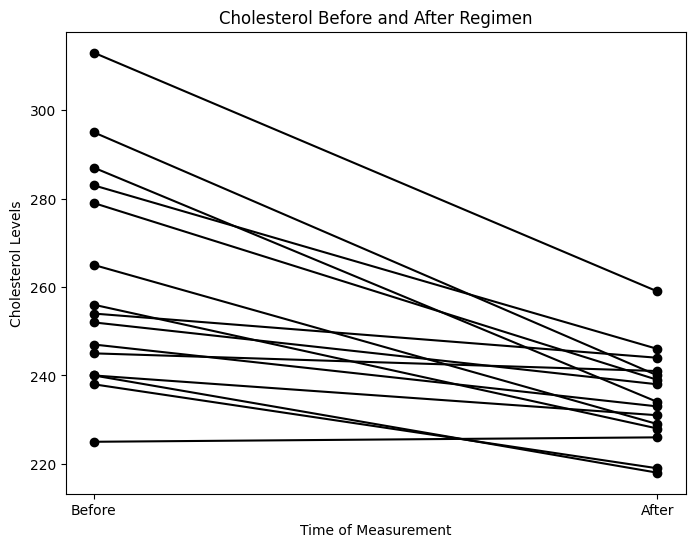

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(np.zeros(len(before)), before, color='black')
ax.scatter(np.ones(len(after)), after, color='black')
for i in range(len(before)):
    ax.plot([0, 1], [before[i], after[i]], c='black', linestyle='-')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Before', 'After'])
ax.set_xlabel('Time of Measurement')
ax.set_ylabel('Cholesterol Levels')
ax.set_title('Cholesterol Before and After Regimen')
plt.show()

In [24]:
# Cholesterol levels before and after
before = np.array([265, 240, 256, 295, 252, 245, 287, 313, 254, 279, 283, 240, 238, 225, 247])
after  = np.array([229, 231, 228, 240, 238, 241, 234, 259, 244, 239, 246, 218, 219, 226, 233])
w = before - after

# Shapiro-Wilk test for normality
_, shapiro_p_value = stats.shapiro(w)
print(f"Shapiro-Wilk p-value: {shapiro_p_value}")


Shapiro-Wilk p-value: 0.2781381607055664


In [25]:
mean_diff = np.mean(w)
mean_diff

26.266666666666666

In [26]:
stdev_diff = np.std(w, ddof=1)
stdev_diff

18.67950238961974

In [27]:
alpha = 0.05

before = np.array([265, 240, 256, 295, 252, 245, 287, 313, 254, 279, 283, 240, 238, 225, 247])
after  = np.array([229, 231, 228, 240, 238, 241, 234, 259, 244, 239, 246, 218, 219, 226, 233])
w = before - after

t_statistic, _ = stats.ttest_rel(before, after)
n = len(before)
df = n - 1
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha, df)

print(f"t-statistic: {t_statistic:.4f}")
print(f"critical t: {t_critical:.4f}")

t-statistic: 5.4461
critical t: 1.7613


In [28]:
mean_diff = np.mean(w)
stdev_diff = np.std(w, ddof=1)
t_critical = stats.t.ppf(1 - alpha, df=n-1)
ci_lower = mean_diff - t_critical * (stdev_diff / np.sqrt(n))

print(f"One-sided 95% confidence interval lower bound: {ci_lower}")

One-sided 95% confidence interval lower bound: 17.771820717410186
